In [1]:
import pandas as pd
b = pd.read_csv(r'C:\Users\dty\Desktop\chatbot\beeradvocate\beer\beer_review1.csv')

In [ ]:
import re
b['review'] = b['review'].apply(lambda x : re.sub('<br>|\n|&amp', '', x))

In [ ]:
def data_text_cleaning(data):
 
    # 영문자 이외 문자는 공백으로 변환
    only_english = re.sub('[^a-zA-Z\.]', ' ', data)
 
    # 소문자 변환
    no_capitals = only_english.lower().split()
 
    # 불용어 제거
    stops = set(stopwords.words('english'))
    no_stops = [word for word in no_capitals if not word in stops]
 
    # 어간 추출
  
    lemmatizer = WordNetLemmatizer() 
    stemmer_words = [lemmatizer.lemmatize(word) for word in no_stops]
 
    # 공백으로 구분된 문자열로 결합하여 결과 반환
    return ' '.join(stemmer_words)


In [ ]:
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer 
b['tokens'] = b['review'].apply(lambda x : data_text_cleaning(x))

In [ ]:
b['style'].value_counts()

In [ ]:
b = b[b['review_ct']>= 10]
b = b.reset_index(drop=True)

In [ ]:
b['score'][0]

In [ ]:
# a['score'][0].split('<span class="muted">')[1].split('</span>')[0]
import re
def data_text_cleaning2(text):
    try:
        mid_text = text.split('<br><span class="muted">')[1].split('</span>')[0]
        return mid_text
    except:
        pass
b['score'] = b['score'].apply(lambda x : data_text_cleaning2(x))

In [ ]:
b.to_csv('beer_aftertokens.csv')

In [ ]:
def printing(num):
    print(b['review'][num],'\n')
    print(b['tokens'][num])

In [ ]:
## 헷갈리는단어 = ['flavor', 맛과 향,'tongue', 맛과 목넘김]
taste = ['taste','t:','tasting']
look = ['look','l:','appearance','a:','color']
smell = ['smell','s:','aroma','n:','nose']
feel = ['feel','f:','touch','m:','mouthfeel','mouth feel','mouth','mouthful','drink','swallowing']
overall = ['overall','oa:','o:']

In [ ]:
printing(61)

### beer 문장의 단어들 수

In [1]:
import pandas as pd

In [5]:
a = pd.read_csv('beer_aftertokens.csv',index_col = 0)

In [16]:
a['review'][0]

'A-Pours a hazy light amber golden color with a slight head and lacingA-Aroma had wheat, spices and herbal hintsT-The taste follows the nose with a wheat, spices and herbal flavorM-A light bodied moderately carbonated beerO-A good Weizenbock'

In [17]:
temp = []
for idx in range(0, len(a)):
    for idx2 in a['tokens'][idx].split('.'):
        if len(idx2.strip().split())>3:
            temp_dict ={}
            temp_dict = {'name': a['name'][idx],
                         'style':a['style'][idx],
                         'sentence':idx2.strip()
                        }
            temp.append(temp_dict)

In [18]:
beer = pd.DataFrame(temp)

In [21]:
beer.to_csv('beer_sentence_v1.csv')

### 위에까지만

In [5]:
import re
def aaa(abb):
    try:
        d= []
        abc = abb.split('.')
        for idx in abc:
            d.append(len(idx.split(' ')))
        return d
    except:
        pass
a['len'] =a['tokens'].apply(lambda x : aaa(x))

In [23]:
ddd = pd.DataFrame(a)
ddd.to_csv('받아라아.csv')

In [8]:
abc = []
for idx in a['len']:
    for idx2 in idx:
        abc.append(idx2)

In [15]:
import numpy as np

a = np.array(abc)
b = np.mean(a)

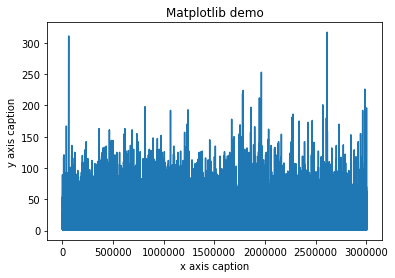

In [20]:
from matplotlib import pyplot as plt 

x = a
plt.title("Matplotlib demo") 
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption") 
plt.plot(x) 
plt.show()

In [37]:
(len(ddd)-len(ddd[ddd[0] <=17]))/len(ddd)*100

2.9002417810572574